In [1]:
# --- Notebook import fix (VS Code safe) ---
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

print("Project root set to:", PROJECT_ROOT)


Project root set to: d:\Citadel Latency-Aware Explainable Decision System


### Decision

In [2]:
from data.synthetic_generator import generate_time_series
from core.features import compute_features
from core.model import prepare_dataset, build_model
from core.latency import LatencySimulator
from core.decision import DecisionEngine

# Data + features
df = generate_time_series()
features_df = compute_features(df)

X, y = prepare_dataset(features_df)

# Model
model = build_model()
model.fit(X, y)

# Take one sample
sample_X = X.iloc[[0]]
prob = model.predict_proba(sample_X)[0, 1]

# Latency simulation
latency_sim = LatencySimulator()
latency_info = latency_sim.simulate()

# Decision
engine = DecisionEngine()
decision = engine.decide(prob, latency_info)

print(decision)


{'ingestion': 2.161366798933305, 'feature': 9.439974734333717, 'inference': 1.1623381896322005, 'total': 12.763679722899221}
{'execute': True, 'reason': 'accepted', 'probability': 0.9, 'latency_ms': 10}
{'execute': False, 'reason': 'probability_below_threshold', 'probability': 0.4, 'latency_ms': 10}
{'execute': False, 'reason': 'latency_budget_exceeded', 'probability': 0.9, 'latency_ms': 30}
{'execute': False, 'reason': 'probability_below_threshold', 'probability': np.float64(0.507933812355814), 'latency_ms': 13.604249076673023}


d:\Citadel Latency-Aware Explainable Decision System\data\synthetic_generator.py:50: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  "timestamp": pd.date_range(start="2024-01-01", periods=n_steps, freq="S"),


### Metrics

In [3]:
from evaluation.metrics import get_feature_contributions, explain_decision

# Get feature contributions
feature_contrib = get_feature_contributions(model, sample_X)

# Explain decision
explanation = explain_decision(decision, feature_contrib)
print(explanation)


Decision: probability_below_threshold. Probability=0.51, Latency=13.6 ms. Top contributing features: rolling_mean (+0.040), rolling_std (-0.019), momentum (+0.004)


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

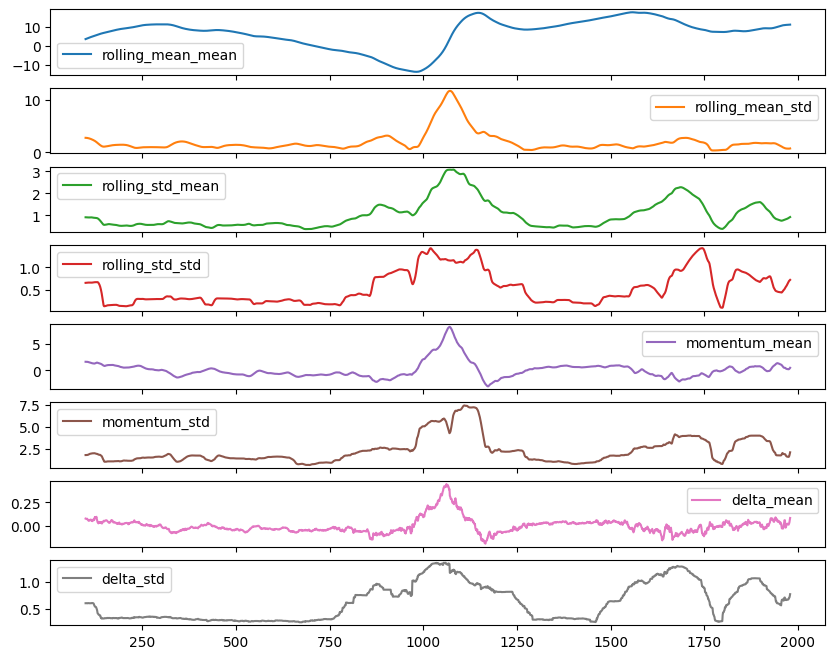

In [4]:
from evaluation.metrics import compute_feature_drift

drift_df = compute_feature_drift(features_df[[
    "rolling_mean", "rolling_std", "momentum", "delta"
]])

drift_df.plot(subplots=True, figsize=(10, 8))
